# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem, as the label is categorical: "passed" or "failed", and not a numerical value.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")
student_data.head()

Student data read successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = len(student_data.columns[:-1])

# TODO: Calculate passing students
n_passed = sum([1 for p in student_data["passed"] if p=="yes"])

# TODO: Calculate failing students
n_failed =  sum([1 for p in student_data["passed"] if p=="no"])

# TODO: Calculate graduation rate
grad_rate = n_passed/n_students

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
#X_train = None
#X_test = None
#y_train = None
#y_test = None
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.24, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Training label has {} samples.".format(y_train.shape[0]))
print("Testing label has {} samples.".format(y_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.
Training label has 300 samples.
Testing label has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
#Gaussian Naive Bayes (GaussianNB)
#Decision Trees
#Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
#K-Nearest Neighbors (KNeighbors)
#Stochastic Gradient Descent (SGDC)
#Support Vector Machines (SVM)
#Logistic Regression
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A =svm.SVC(gamma=0.1)
clf_B = AdaBoostClassifier()
clf_C =  GaussianNB()

# TODO: Set up the training set sizes
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_all, y_all, test_size=0.745, random_state=42)

# Show the results of the split
#print("Training set has {} samples.".format(X_train_100.shape[0]))
#print("Testing set has {} samples.".format(X_test_100.shape[0]))

# TODO: Set up the training set sizes
X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(X_all, y_all, test_size=0.493, random_state=42)

# Show the results of the split
#print("Training set has {} samples.".format(X_train_200.shape[0]))
#print("Testing set has {} samples.".format(X_test_200.shape[0]))

# TODO: Set up the training set sizes
X_train_300, X_test_300, y_train_300, y_test_300 = train_test_split(X_all, y_all, test_size=0.24, random_state=42)

# Show the results of the split
#print("Training set has {} samples.".format(X_train_300.shape[0]))
#print("Testing set has {} samples.".format(X_test_300.shape[0]))

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A,clf_B,clf_C]:
    for [X_train, X_test, y_train,y_test] in [[X_train_100, X_test_100, y_train_100, y_test_100],[X_train_200, X_test_200, y_train_200, y_test_200],[X_train_300, X_test_300, y_train_300, y_test_300]]:
       train_predict(clf, X_train, y_train, X_test, y_test)

Training a SVC using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.8098.
Training a SVC using a training set size of 200. . .
Trained model in 0.0040 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9930.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7898.
Training a SVC using a training set size of 300. . .
Trained model in 0.0130 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.9762.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7895.
Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.0541 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.9701.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.7440.
Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.0551 s

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC** 


| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0042 seconds     |      0.0020 seconds    |      1.0000      |  0.8098         |
| 200               |        0.0040 seconds   |   0.0030 seconds       |    0.9930        | 0.7898
| 300               |        0.0070 seconds   |   0.0020 seconds       |    0.9762        | 0.7895      |

** Classifer 2 - AdaBoostClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.1053 seconds       |     0.0153 seconds     |   0.9701         |  0.7440    |
| 200               |    0.1113 seconds       |     0.0118 seconds     |   0.8836         |  0.7653   |
| 300               |    0.1436 seconds       |     0.0079 seconds     |   0.8637         |  0.7820    |

** Classifer 3 - GaussianNB** 

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0042 seconds         |   0.0050 seconds       |   0.8308         | 0.6935      |
| 200               |   0.0040 seconds        |   0.0012 seconds       |   0.8102         | 0.7472      |
| 300               |  0.0054 seconds         |   0.0040 seconds       |  0.8038          | 0.7634      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [8]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score,fbeta_score, make_scorer




# TODO: Create the parameters list you wish to tune
param_grid = {"base_estimator__max_depth" : [1,2,3,4],
              "base_estimator__random_state" : [1,42],
              "base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5],
              "random_state" : [1,42],
              "algorithm" : ["SAMME", "SAMME.R"]
             }

# TODO: Initialize the classifier
DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto")
clf =  AdaBoostClassifier(base_estimator = DTC)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='binary',pos_label="yes")
#ftwo_scorer = make_scorer(fbeta_score, beta=2)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=param_grid, scoring = f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='random'),
          learning_rate=1.0, n_estimators=1, random_state=42)
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8354.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8000.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

In [9]:
# For each feature find the data points with extreme high or low values
outliers_number=[0 for i in range(0,len(X_all))]
for feature in X_all.keys():
    #print(feature)
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(X_all[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(X_all[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    print(step)
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    o=X_all[~((X_all[feature] >= Q1 - step) & (X_all[feature] <= Q3 + step))]
    display(o)
    for i in range(0,len(o)):
        outliers_number[o.iloc[i].name]=outliers_number[o.iloc[i].name]+1

multiple_outliers=[]
for i in range(0,len(outliers_number)):
    if outliers_number[i]>1: 
        multiple_outliers.append(i)
        

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
for i in range(0,len(outliers_number)):
    if outliers_number[i]>0: 
        outliers.append(i)
#outliers  = #[66,95,96,218,338,75,38,65,420,75,122,142,154,161,177,204,237,289,338,356,402]#[]#[66,142,154,289]#
print(outliers)
print(multiple_outliers)

# Remove the outliers, if any were specified
good_data = X_all.drop(X_all.index[multiple_outliers]).reset_index(drop = True)

0.0
Data points considered outliers for the feature 'school_GP':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
349,0,1,0,1,18,1,0,1,0,0,...,1,1,0,2,5,5,5,5,5,10
350,0,1,0,1,19,1,0,1,0,0,...,1,1,0,5,4,4,3,3,2,8
351,0,1,0,1,17,0,1,1,0,0,...,1,1,0,4,5,4,2,3,3,2
352,0,1,0,1,18,0,1,0,1,0,...,0,1,1,4,3,3,2,3,3,7
353,0,1,0,1,19,1,0,1,0,0,...,1,1,0,4,4,4,3,3,5,4
354,0,1,0,1,17,1,0,1,0,0,...,1,1,1,4,5,5,1,3,2,4
355,0,1,1,0,18,0,1,1,0,0,...,1,0,1,5,3,4,1,1,5,0
356,0,1,1,0,17,1,0,1,0,0,...,1,1,0,4,3,3,1,2,5,4
357,0,1,1,0,17,0,1,0,1,1,...,1,0,1,1,2,3,1,2,5,2
358,0,1,0,1,18,0,1,0,1,0,...,1,1,1,3,3,2,1,2,3,4


0.0
Data points considered outliers for the feature 'school_MS':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
349,0,1,0,1,18,1,0,1,0,0,...,1,1,0,2,5,5,5,5,5,10
350,0,1,0,1,19,1,0,1,0,0,...,1,1,0,5,4,4,3,3,2,8
351,0,1,0,1,17,0,1,1,0,0,...,1,1,0,4,5,4,2,3,3,2
352,0,1,0,1,18,0,1,0,1,0,...,0,1,1,4,3,3,2,3,3,7
353,0,1,0,1,19,1,0,1,0,0,...,1,1,0,4,4,4,3,3,5,4
354,0,1,0,1,17,1,0,1,0,0,...,1,1,1,4,5,5,1,3,2,4
355,0,1,1,0,18,0,1,1,0,0,...,1,0,1,5,3,4,1,1,5,0
356,0,1,1,0,17,1,0,1,0,0,...,1,1,0,4,3,3,1,2,5,4
357,0,1,1,0,17,0,1,0,1,1,...,1,0,1,1,2,3,1,2,5,2
358,0,1,0,1,18,0,1,0,1,0,...,1,1,1,3,3,2,1,2,3,4


1.5
Data points considered outliers for the feature 'sex_F':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'sex_M':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


3.0
Data points considered outliers for the feature 'age':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
247,1,0,0,1,22,0,1,1,0,0,...,0,1,1,5,4,5,5,5,1,16


0.0
Data points considered outliers for the feature 'address_R':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
24,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
32,1,0,0,1,15,1,0,1,0,0,...,1,1,1,4,5,2,1,1,5,0
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
38,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
39,1,0,1,0,15,1,0,1,0,0,...,1,0,0,4,3,1,1,1,2,8
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6
68,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,1,3,1,3,4,2
69,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,4,2,2,3,3,12
72,1,0,1,0,15,1,0,1,0,0,...,1,1,1,3,3,4,2,4,5,2
95,1,0,1,0,15,1,0,1,0,0,...,1,1,0,3,1,2,1,1,1,2


0.0
Data points considered outliers for the feature 'address_U':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
24,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
32,1,0,0,1,15,1,0,1,0,0,...,1,1,1,4,5,2,1,1,5,0
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
38,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
39,1,0,1,0,15,1,0,1,0,0,...,1,0,0,4,3,1,1,1,2,8
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6
68,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,1,3,1,3,4,2
69,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,4,2,2,3,3,12
72,1,0,1,0,15,1,0,1,0,0,...,1,1,1,3,3,4,2,4,5,2
95,1,0,1,0,15,1,0,1,0,0,...,1,1,0,3,1,2,1,1,1,2


1.5
Data points considered outliers for the feature 'famsize_GT3':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'famsize_LE3':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'Pstatus_A':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
8,1,0,0,1,15,0,1,0,1,1,...,1,1,0,4,2,2,1,1,1,0
14,1,0,0,1,15,0,1,1,0,1,...,1,1,1,4,5,2,1,1,3,0
28,1,0,0,1,16,0,1,0,1,1,...,1,1,0,5,3,3,1,1,5,4
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
45,1,0,1,0,15,0,1,0,1,1,...,1,1,1,5,2,2,1,1,5,8
46,1,0,1,0,16,0,1,0,1,1,...,1,1,0,2,3,5,1,4,3,12
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
54,1,0,1,0,15,0,1,0,1,1,...,1,1,0,5,3,4,4,4,1,6


0.0
Data points considered outliers for the feature 'Pstatus_T':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
8,1,0,0,1,15,0,1,0,1,1,...,1,1,0,4,2,2,1,1,1,0
14,1,0,0,1,15,0,1,1,0,1,...,1,1,1,4,5,2,1,1,3,0
28,1,0,0,1,16,0,1,0,1,1,...,1,1,0,5,3,3,1,1,5,4
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
45,1,0,1,0,15,0,1,0,1,1,...,1,1,1,5,2,2,1,1,5,8
46,1,0,1,0,16,0,1,0,1,1,...,1,1,0,2,3,5,1,4,3,12
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
54,1,0,1,0,15,0,1,0,1,1,...,1,1,0,5,3,4,4,4,1,6


3.0
Data points considered outliers for the feature 'Medu':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'Fedu':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
76,1,0,0,1,15,0,1,1,0,0,...,1,1,0,3,4,3,1,1,1,8
171,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,3,2,1,1,3,2


0.0
Data points considered outliers for the feature 'Mjob_at_home':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
39,1,0,1,0,15,1,0,1,0,0,...,1,0,0,4,3,1,1,1,2,8
79,1,0,1,0,16,0,1,1,0,0,...,1,1,0,2,4,3,1,2,3,12
86,1,0,1,0,16,0,1,0,1,0,...,1,0,0,4,3,4,1,2,2,4
95,1,0,1,0,15,1,0,1,0,0,...,1,1,0,3,1,2,1,1,1,2
112,1,0,1,0,16,0,1,1,0,0,...,1,1,0,3,1,2,1,1,5,6
120,1,0,1,0,15,0,1,1,0,0,...,1,1,0,3,2,3,1,2,1,2
127,1,0,1,0,19,0,1,1,0,0,...,0,0,0,3,4,2,1,1,5,2


0.0
Data points considered outliers for the feature 'Mjob_health':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
12,1,0,0,1,15,0,1,0,1,0,...,1,1,0,4,3,3,1,3,5,2
15,1,0,1,0,16,0,1,1,0,0,...,1,1,0,4,4,4,1,2,2,4
19,1,0,0,1,16,0,1,0,1,0,...,1,1,0,3,1,3,1,3,5,4
21,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,1,1,5,0
27,1,0,0,1,15,0,1,1,0,0,...,1,1,0,2,2,4,2,4,1,4
30,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,3,4,5,0
47,1,0,0,1,16,0,1,1,0,0,...,1,1,0,4,2,2,1,1,2,4
51,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,3,1,1,5,2
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6


1.5
Data points considered outliers for the feature 'Mjob_other':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'Mjob_services':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'Mjob_teacher':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
10,1,0,1,0,15,0,1,1,0,0,...,1,1,0,3,3,3,1,2,2,0
13,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,3,1,2,3,2
20,1,0,0,1,15,0,1,1,0,0,...,1,1,0,4,4,1,1,1,1,0
22,1,0,0,1,16,0,1,0,1,0,...,1,1,0,4,5,1,1,3,5,2
29,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,4,5,5,5,5,16
32,1,0,0,1,15,1,0,1,0,0,...,1,1,1,4,5,2,1,1,5,0
36,1,0,0,1,15,0,1,0,1,0,...,1,1,0,5,4,3,1,1,4,2
41,1,0,0,1,15,0,1,0,1,0,...,1,1,1,5,4,3,2,4,5,8
48,1,0,0,1,15,0,1,1,0,0,...,1,0,0,4,3,3,2,2,5,2
57,1,0,0,1,15,0,1,1,0,0,...,1,0,0,3,2,2,1,1,5,4


0.0
Data points considered outliers for the feature 'Fjob_at_home':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
32,1,0,0,1,15,1,0,1,0,0,...,1,1,1,4,5,2,1,1,5,0
44,1,0,1,0,16,0,1,0,1,0,...,1,1,0,4,3,3,2,2,5,14
58,1,0,0,1,15,0,1,0,1,0,...,1,1,0,4,3,2,1,1,5,2
99,1,0,1,0,16,0,1,1,0,0,...,1,1,0,5,3,5,1,1,3,0
135,1,0,1,0,15,0,1,1,0,0,...,1,1,1,4,3,3,1,1,5,0
143,1,0,1,0,16,0,1,0,1,0,...,1,1,0,3,4,4,3,3,1,2
153,1,0,0,1,19,0,1,1,0,0,...,0,1,1,4,5,4,1,1,4,0
219,1,0,1,0,17,0,1,1,0,0,...,1,1,0,4,3,3,1,1,4,4
257,1,0,0,1,19,0,1,0,1,1,...,1,1,0,4,3,1,1,1,1,12
273,1,0,0,1,17,1,0,1,0,0,...,1,0,1,3,5,2,2,2,1,2


0.0
Data points considered outliers for the feature 'Fjob_health':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
10,1,0,1,0,15,0,1,1,0,0,...,1,1,0,3,3,3,1,2,2,0
21,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,1,1,5,0
24,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
38,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
57,1,0,0,1,15,0,1,1,0,0,...,1,0,0,3,2,2,1,1,5,4
63,1,0,1,0,16,0,1,1,0,0,...,1,1,0,3,4,4,2,4,4,2
89,1,0,0,1,16,0,1,0,1,1,...,1,0,0,4,1,3,3,5,5,18
94,1,0,0,1,15,0,1,0,1,0,...,1,1,0,4,3,4,1,1,4,6
105,1,0,1,0,15,0,1,1,0,1,...,1,0,0,4,3,3,1,1,4,10


1.5
Data points considered outliers for the feature 'Fjob_other':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'Fjob_services':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'Fjob_teacher':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
29,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,4,5,5,5,5,16
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
42,1,0,0,1,15,0,1,1,0,0,...,1,1,0,4,3,3,1,1,5,2
49,1,0,1,0,15,0,1,1,0,0,...,1,1,0,4,4,4,1,1,3,2
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6
101,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,4,3,1,1,4,0
110,1,0,0,1,15,0,1,0,1,1,...,1,1,0,5,5,3,1,1,4,6
115,1,0,0,1,16,0,1,1,0,0,...,1,1,0,5,4,4,1,2,5,2


1.5
Data points considered outliers for the feature 'reason_course':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'reason_home':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'reason_other':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
21,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,1,1,5,0
27,1,0,0,1,15,0,1,1,0,0,...,1,1,0,2,2,4,2,4,1,4
35,1,0,1,0,15,0,1,1,0,0,...,1,0,0,3,5,1,1,1,5,0
49,1,0,1,0,15,0,1,1,0,0,...,1,1,0,4,4,4,1,1,3,2
51,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,3,1,1,5,2
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
54,1,0,1,0,15,0,1,0,1,1,...,1,1,0,5,3,4,4,4,1,6
55,1,0,1,0,16,0,1,1,0,1,...,1,1,1,5,3,4,1,1,2,8
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6


1.5
Data points considered outliers for the feature 'reason_reputation':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'guardian_father':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4
11,1,0,1,0,15,0,1,1,0,0,...,1,1,0,5,2,2,1,1,4,4
12,1,0,0,1,15,0,1,0,1,0,...,1,1,0,4,3,3,1,3,5,2
19,1,0,0,1,16,0,1,0,1,0,...,1,1,0,3,1,3,1,3,5,4
21,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,1,1,5,0
35,1,0,1,0,15,0,1,1,0,0,...,1,0,0,3,5,1,1,1,5,0
42,1,0,0,1,15,0,1,1,0,0,...,1,1,0,4,3,3,1,1,5,2
43,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,1,1,1,1,0
44,1,0,1,0,16,0,1,0,1,0,...,1,1,0,4,3,3,2,2,5,14


1.5
Data points considered outliers for the feature 'guardian_mother':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'guardian_other':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
14,1,0,0,1,15,0,1,1,0,1,...,1,1,1,4,5,2,1,1,3,0
41,1,0,0,1,15,0,1,0,1,0,...,1,1,1,5,4,3,2,4,5,8
127,1,0,1,0,19,0,1,1,0,0,...,0,0,0,3,4,2,1,1,5,2
137,1,0,1,0,16,0,1,1,0,1,...,1,1,1,4,3,2,1,1,5,0
152,1,0,1,0,15,1,0,1,0,0,...,1,1,1,4,2,1,2,3,3,8
192,1,0,0,1,17,0,1,1,0,0,...,1,1,0,4,4,4,4,5,5,12
210,1,0,1,0,19,0,1,1,0,0,...,1,1,0,4,3,3,1,2,3,10
244,1,0,1,0,18,0,1,1,0,0,...,1,1,1,4,4,4,1,1,3,0
251,1,0,0,1,16,0,1,1,0,0,...,1,1,0,5,3,3,1,3,2,6
270,1,0,1,0,19,0,1,1,0,0,...,1,1,0,4,3,5,3,3,5,15


1.5
Data points considered outliers for the feature 'traveltime':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
61,1,0,1,0,16,0,1,1,0,0,...,1,1,1,5,5,5,5,5,5,6
108,1,0,0,1,15,1,0,1,0,0,...,1,1,1,1,3,5,3,5,1,6
134,1,0,0,1,15,1,0,1,0,0,...,1,0,1,5,3,3,1,1,5,0
149,1,0,0,1,15,0,1,0,1,1,...,1,1,0,4,5,5,2,5,5,0
164,1,0,0,1,17,1,0,0,1,0,...,0,0,1,5,3,5,1,5,5,0
228,1,0,0,1,18,0,1,0,1,0,...,1,1,1,4,3,2,4,5,3,14
327,1,0,0,1,17,1,0,1,0,0,...,1,1,0,4,4,5,5,5,4,8
375,0,1,1,0,18,1,0,1,0,0,...,1,1,0,4,3,2,1,2,4,2


1.5
Data points considered outliers for the feature 'studytime':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
47,1,0,0,1,16,0,1,1,0,0,...,1,1,0,4,2,2,1,1,2,4
66,1,0,0,1,15,0,1,1,0,1,...,1,1,1,1,3,3,5,5,3,4
67,1,0,1,0,16,0,1,1,0,0,...,1,1,0,4,3,3,1,2,5,4
69,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,4,2,2,3,3,12
70,1,0,0,1,16,0,1,1,0,0,...,1,1,0,4,3,2,1,1,5,0
71,1,0,0,1,15,0,1,1,0,0,...,1,1,0,3,3,3,1,1,3,0
76,1,0,0,1,15,0,1,1,0,0,...,1,1,0,3,4,3,1,1,1,8
77,1,0,1,0,16,0,1,1,0,0,...,1,1,1,5,2,3,1,3,3,0
94,1,0,0,1,15,0,1,0,1,0,...,1,1,0,4,3,4,1,1,4,6
95,1,0,1,0,15,1,0,1,0,0,...,1,1,0,3,1,2,1,1,1,2


0.0
Data points considered outliers for the feature 'failures':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
18,1,0,0,1,17,0,1,1,0,0,...,1,1,0,5,5,5,2,4,5,16
25,1,0,1,0,16,0,1,1,0,0,...,1,1,0,1,2,2,1,3,5,14
40,1,0,1,0,16,0,1,0,1,0,...,1,1,1,3,3,3,1,2,3,25
44,1,0,1,0,16,0,1,0,1,0,...,1,1,0,4,3,3,2,2,5,14
49,1,0,1,0,15,0,1,1,0,0,...,1,1,0,4,4,4,1,1,3,2
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
72,1,0,1,0,15,1,0,1,0,0,...,1,1,1,3,3,4,2,4,5,2
78,1,0,0,1,17,0,1,1,0,0,...,0,1,0,4,5,1,1,1,3,2
85,1,0,1,0,15,0,1,1,0,0,...,1,1,1,4,4,4,2,3,5,6


0.0
Data points considered outliers for the feature 'schoolsup':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
17,1,0,1,0,16,0,1,1,0,0,...,1,0,0,5,3,2,1,1,4,4
24,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
28,1,0,0,1,16,0,1,0,1,1,...,1,1,0,5,3,3,1,1,5,4
38,1,0,1,0,15,1,0,1,0,0,...,1,1,0,4,3,2,1,1,5,2
39,1,0,1,0,15,1,0,1,0,0,...,1,0,0,4,3,1,1,1,2,8
43,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,1,1,1,1,0
44,1,0,1,0,16,0,1,0,1,0,...,1,1,0,4,3,3,2,2,5,14


1.5
Data points considered outliers for the feature 'famsup':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'paid':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'activities':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


0.0
Data points considered outliers for the feature 'nursery':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
25,1,0,1,0,16,0,1,1,0,0,...,1,1,0,1,2,2,1,3,5,14
30,1,0,0,1,15,0,1,1,0,0,...,1,1,0,5,4,2,3,4,5,0
33,1,0,0,1,15,0,1,0,1,0,...,1,1,0,5,3,2,1,1,2,0
34,1,0,0,1,16,0,1,1,0,0,...,1,1,0,5,4,3,1,1,5,0
40,1,0,1,0,16,0,1,0,1,0,...,1,1,1,3,3,3,1,2,3,25
41,1,0,0,1,15,0,1,0,1,0,...,1,1,1,5,4,3,2,4,5,8
49,1,0,1,0,15,0,1,1,0,0,...,1,1,0,4,4,4,1,1,3,2
61,1,0,1,0,16,0,1,1,0,0,...,1,1,1,5,5,5,5,5,5,6
66,1,0,0,1,15,0,1,1,0,1,...,1,1,1,1,3,3,5,5,3,4


0.0
Data points considered outliers for the feature 'higher':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
78,1,0,0,1,17,0,1,1,0,0,...,0,1,0,4,5,1,1,1,3,2
127,1,0,1,0,19,0,1,1,0,0,...,0,0,0,3,4,2,1,1,5,2
148,1,0,0,1,16,0,1,1,0,0,...,0,1,1,3,3,2,2,1,5,0
150,1,0,0,1,18,0,1,0,1,0,...,0,1,1,2,3,5,2,5,4,0
153,1,0,0,1,19,0,1,1,0,0,...,0,1,1,4,5,4,1,1,4,0
160,1,0,0,1,17,1,0,0,1,0,...,0,1,1,3,3,2,2,2,5,0
163,1,0,0,1,17,0,1,1,0,0,...,0,1,0,5,3,3,1,4,2,2
164,1,0,0,1,17,1,0,0,1,0,...,0,0,1,5,3,5,1,5,5,0
165,1,0,0,1,16,0,1,1,0,0,...,0,0,0,4,5,2,1,1,2,16
166,1,0,0,1,16,0,1,1,0,0,...,0,1,0,4,3,5,2,4,4,4


0.0
Data points considered outliers for the feature 'internet':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
17,1,0,1,0,16,0,1,1,0,0,...,1,0,0,5,3,2,1,1,4,4
35,1,0,1,0,15,0,1,1,0,0,...,1,0,0,3,5,1,1,1,5,0
39,1,0,1,0,15,1,0,1,0,0,...,1,0,0,4,3,1,1,1,2,8
48,1,0,0,1,15,0,1,1,0,0,...,1,0,0,4,3,3,2,2,5,2
52,1,0,0,1,15,0,1,0,1,1,...,1,0,0,5,5,5,3,4,5,6
57,1,0,0,1,15,0,1,1,0,0,...,1,0,0,3,2,2,1,1,5,4
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6


1.5
Data points considered outliers for the feature 'romantic':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'famrel':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
25,1,0,1,0,16,0,1,1,0,0,...,1,1,0,1,2,2,1,3,5,14
27,1,0,0,1,15,0,1,1,0,0,...,1,1,0,2,2,4,2,4,1,4
37,1,0,0,1,16,1,0,1,0,1,...,1,1,1,2,4,3,1,1,5,7
46,1,0,1,0,16,0,1,0,1,1,...,1,1,0,2,3,5,1,4,3,12
60,1,0,1,0,16,1,0,1,0,0,...,1,0,0,2,4,4,2,3,4,6
66,1,0,0,1,15,0,1,1,0,1,...,1,1,1,1,3,3,5,5,3,4
79,1,0,1,0,16,0,1,1,0,0,...,1,1,0,2,4,3,1,2,3,12
108,1,0,0,1,15,1,0,1,0,0,...,1,1,1,1,3,5,3,5,1,6
140,1,0,0,1,15,0,1,1,0,0,...,1,1,0,2,2,2,1,1,3,0
141,1,0,0,1,16,0,1,0,1,0,...,1,1,0,2,3,3,2,2,2,8


1.5
Data points considered outliers for the feature 'freetime':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
7,1,0,1,0,17,0,1,1,0,1,...,1,0,0,4,1,4,1,1,1,6
19,1,0,0,1,16,0,1,0,1,0,...,1,1,0,3,1,3,1,3,5,4
68,1,0,1,0,15,1,0,0,1,0,...,1,1,0,4,1,3,1,3,4,2
89,1,0,0,1,16,0,1,0,1,1,...,1,0,0,4,1,3,3,5,5,18
95,1,0,1,0,15,1,0,1,0,0,...,1,1,0,3,1,2,1,1,1,2
106,1,0,1,0,15,0,1,1,0,0,...,1,1,0,5,1,2,1,1,3,8
111,1,0,1,0,16,1,0,1,0,0,...,1,1,0,4,1,2,1,1,2,0
112,1,0,1,0,16,0,1,1,0,0,...,1,1,0,3,1,2,1,1,5,6
168,1,0,1,0,16,0,1,1,0,0,...,1,1,0,5,1,5,1,1,4,0
189,1,0,0,1,17,1,0,1,0,0,...,1,0,0,3,1,3,1,5,3,4


3.0
Data points considered outliers for the feature 'goout':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


1.5
Data points considered outliers for the feature 'Dalc':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
29,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,4,5,5,5,5,16
54,1,0,1,0,15,0,1,0,1,1,...,1,1,0,5,3,4,4,4,1,6
61,1,0,1,0,16,0,1,1,0,0,...,1,1,1,5,5,5,5,5,5,6
66,1,0,0,1,15,0,1,1,0,1,...,1,1,1,1,3,3,5,5,3,4
100,1,0,0,1,16,0,1,1,0,0,...,1,1,0,4,5,5,5,5,4,14
159,1,0,0,1,16,0,1,1,0,0,...,1,1,1,4,5,5,4,4,5,4
175,1,0,0,1,17,0,1,0,1,0,...,1,1,0,4,4,4,4,4,4,4
192,1,0,0,1,17,0,1,1,0,0,...,1,1,0,4,4,4,4,5,5,12
211,1,0,0,1,17,0,1,0,1,0,...,1,1,1,5,3,5,4,5,3,13
223,1,0,0,1,18,0,1,1,0,0,...,1,1,0,3,3,3,5,5,4,0


3.0
Data points considered outliers for the feature 'Walc':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


3.0
Data points considered outliers for the feature 'health':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences


12.0
Data points considered outliers for the feature 'absences':


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
40,1,0,1,0,16,0,1,0,1,0,...,1,1,1,3,3,3,1,2,3,25
74,1,0,1,0,16,0,1,1,0,0,...,1,1,0,4,3,3,2,4,5,54
103,1,0,1,0,15,0,1,1,0,0,...,1,1,0,4,3,5,1,1,2,26
183,1,0,1,0,17,0,1,0,1,0,...,1,1,1,5,3,3,2,3,1,56
198,1,0,1,0,17,0,1,1,0,0,...,1,1,0,4,2,4,2,3,2,24
205,1,0,1,0,17,0,1,1,0,0,...,1,1,1,4,4,3,3,4,5,28
216,1,0,1,0,17,0,1,1,0,0,...,1,1,1,3,4,5,2,4,1,22
260,1,0,1,0,18,0,1,1,0,0,...,1,1,1,3,1,2,1,3,2,21
276,1,0,1,0,18,1,0,1,0,1,...,0,1,1,4,1,1,1,1,5,75
277,1,0,0,1,18,0,1,1,0,0,...,1,1,0,3,2,4,1,4,3,22


[0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 24

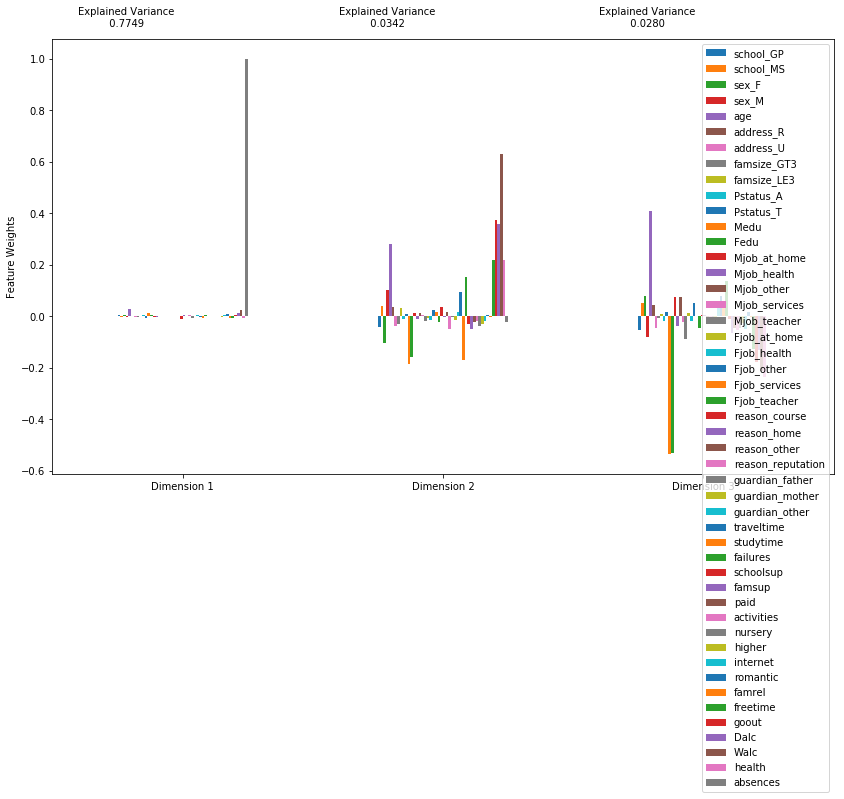

In [10]:
### Added clustering
import visuals_AK as vs
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X_all)

# TODO: Transform log_samples using the PCA fit above
pca_samples =pca.transform(X_all)

# Generate PCA results plot
pca_results = vs.pca_results(X_all, pca)

In [11]:
for a in pca.explained_variance_ratio_:
    print("{0:.2f}".format(a)) 

0.77
0.03
0.03


In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=3).fit(X_all)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(X_all)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', "Dimension 3"])

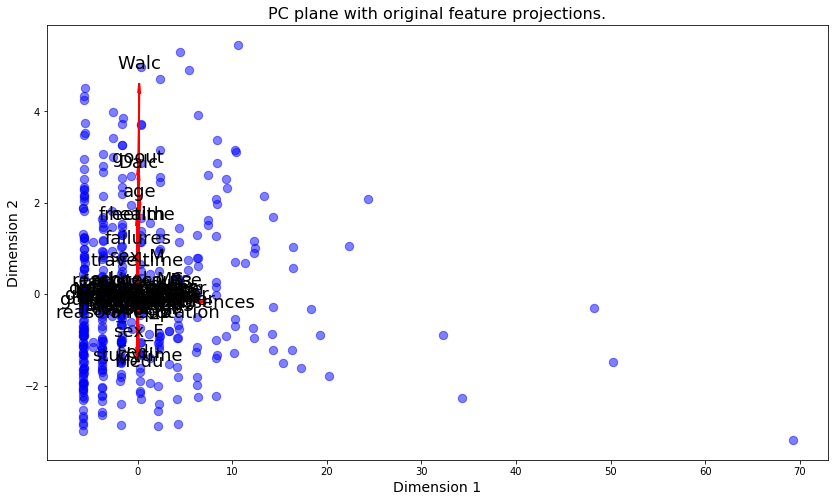

In [13]:
vs.biplot(X_all, reduced_data, pca)

In [14]:
import helper_AK as helper
%matplotlib inline
from sklearn.cluster import KMeans


#helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')
kmeans_1 = KMeans(n_clusters=3, random_state=0)
kmeans_1.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

TypeError: scatter() missing 2 required positional arguments: 'xs' and 'ys'

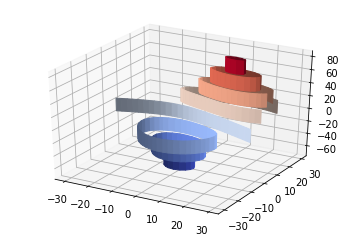

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import visuals_AK as vs
clusterer = KMeans(n_clusters=3,random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
# Display the results of the clustering from implementation
vs.cluster_results_AK(reduced_data, preds, centers, pca_samples)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.